In [1]:
import pandas as pd
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore", category=RuntimeWarning) 


## Data Understanding and Exploration

Reading our data file


In [2]:
cd=pd.read_csv('autodata-mpg.csv')
# car data

In [3]:
cd.head(5)


,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


Understanding the features and data

In [4]:
cd.shape

(5975, 13)

In [5]:
cd.columns


Index(['Name', 'Manufacturer', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine CC', 'Power',
       'Seats', 'Mileage Km/L', 'Price'],
      dtype='object')

In [6]:
#lets find unique objects in Manufacture , Location ,Fuel_Type , Transmission , Owner-type , Seats 

print(cd['Owner_Type'].unique())
print(cd['Transmission'].unique())
print(cd['Manufacturer'].unique())
print(cd['Fuel_Type'].unique())
print(cd['Seats'].unique())
print(cd['Manufacturer'].nunique())

['First' 'Second' 'Fourth' 'Third']
['Manual' 'Automatic']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'MercedesBenz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
['CNG' 'Diesel' 'Petrol' 'LPG']
[ 5  7  8  4  6  2 10  9  0]
31


In [7]:
# and range in Engine , Mileage and Price
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    print(min_val,"  ", max_val)

print('Price range in lakhs: ')
minmax(cd['Price'])
print ('\n')

print('Engine Range in CC: ')
minmax(cd['Engine CC'])
print ('\n')

print('Mileage range in Km/l : ')
minmax(cd['Mileage Km/L'])
print ('\n')


Price range in lakhs: 
0.44    160.0


Engine Range in CC: 
624    5998


Mileage range in Km/l : 
0.0    33.54




As you can see above , Our company have large number of car .
We have cars include from Maruti to Porsche , above 30 companies car and their price range from 0.44 lakhs to 1.60 Cr and their engine range from 650 to 5500CC.

Imputing a New coloumn derived from 'Name' coloumn in the datasheet



In [8]:
# #Brand is the new coloumn containing only the Brand Name of cars#
cd['Brand'] = cd.Name.str.split().str.get(0)
cd.head(5)

,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Brand
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,Hyundai
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,Honda
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,Audi


## Data Preprocessing

Checking for null values

In [9]:
cd.isnull().sum()


Name                 0
Manufacturer         0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine CC            0
Power                0
Seats                0
Mileage Km/L         0
Price                0
Brand                0
dtype: int64

From the above , we can say that there is no missing value 

In [10]:
cd.describe()


,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,1621.606695,112.599819,5.278828,18.179408,9.501647
std,3.247238,9.155851e+04,601.036987,53.659495,0.808959,4.521801,11.205736
min,1998.000000,1.710000e+02,624.000000,34.200000,0.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,21.100000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,33.540000,160.000000


In [11]:
cd['Kilometers_Driven']/=1000


In [12]:
final_data=cd.rename(columns={'Power':'Power(bhp)','Kilometers_Driven':'km_Driven'})


In [13]:
final_data.head()

,Name,Manufacturer,Location,Year,km_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72.00,CNG,Manual,First,998,58.16,5,26.60,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41.00,Diesel,Manual,First,1582,126.20,5,19.67,12.50,Hyundai
2,Honda Jazz V,Honda,Chennai,2011,46.00,Petrol,Manual,First,1199,88.70,5,18.20,4.50,Honda
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87.00,Diesel,Manual,First,1248,88.76,7,20.77,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40.67,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,Audi


In [14]:
final_data['No of Years']=2022-final_data['Year']


In [15]:
final_data=final_data.drop(['Year'], axis=1)


In [16]:
final_data.head()

,Name,Manufacturer,Location,km_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,72.00,CNG,Manual,First,998,58.16,5,26.60,1.75,Maruti,12
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,41.00,Diesel,Manual,First,1582,126.20,5,19.67,12.50,Hyundai,7
2,Honda Jazz V,Honda,Chennai,46.00,Petrol,Manual,First,1199,88.70,5,18.20,4.50,Honda,11
3,Maruti Ertiga VDI,Maruti,Chennai,87.00,Diesel,Manual,First,1248,88.76,7,20.77,6.00,Maruti,10
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,40.67,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,Audi,9


In [17]:
final_data=pd.get_dummies(final_data ,columns=['Transmission' ], drop_first=True)


In [18]:
final_data.head()


,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,72.00,CNG,First,998,58.16,5,26.60,1.75,Maruti,12,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,41.00,Diesel,First,1582,126.20,5,19.67,12.50,Hyundai,7,1
2,Honda Jazz V,Honda,Chennai,46.00,Petrol,First,1199,88.70,5,18.20,4.50,Honda,11,1
3,Maruti Ertiga VDI,Maruti,Chennai,87.00,Diesel,First,1248,88.76,7,20.77,6.00,Maruti,10,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,40.67,Diesel,Second,1968,140.80,5,15.20,17.74,Audi,9,0


In [19]:
final_data.shape

(5975, 14)

checking for duplicate rows


In [20]:
final_data.duplicated().sum()


0

Storing the index values of rows for those coloumns having '0' values

In [21]:
zero_val_milg = final_data[final_data['Mileage Km/L']==0].index.tolist()
zero_val_seat =final_data[final_data.Seats==0].index.tolist()
zero_val_eng = final_data[final_data['Engine CC']==0].index.tolist()


Droping the rows that have '0's' in obivious coloumns

In [22]:
final_data.drop(labels =zero_val_milg ,inplace =True)
final_data.drop(labels =zero_val_seat ,inplace =True)
final_data.drop(labels =zero_val_eng ,inplace =True)

In [23]:
final_data.shape

(5918, 14)

In [24]:
final_data.describe()

,km_Driven,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,No of Years,Transmission_Manual
count,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000
mean,58.518142,1619.999662,112.650201,5.281176,18.352731,9.477273,8.575363,0.715275
std,91.866409,598.149133,53.651260,0.805185,4.180405,11.158216,3.208118,0.451321
min,0.171000,624.000000,34.200000,2.000000,6.400000,0.440000,3.000000,0.000000
25%,33.855750,1198.000000,74.000000,5.000000,15.300000,3.500000,6.000000,0.000000
50%,53.000000,1493.000000,93.700000,5.000000,18.200000,5.650000,8.000000,1.000000
75%,72.671000,1982.500000,138.100000,5.000000,21.100000,9.915000,10.000000,1.000000
max,6500.000000,5998.000000,560.000000,10.000000,33.540000,160.000000,24.000000,1.000000


In [73]:
final_data.corr()


,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,No of Years,Transmission_Manual
km_Driven,1.000000,-0.258689,0.241865,0.219807,0.029170,0.237426,-0.171930,-0.174329,0.500191,0.116798
Fuel_Type,-0.258689,1.000000,0.035764,-0.459853,-0.327096,-0.298060,-0.144955,-0.343591,0.111059,0.121072
Owner_Type,0.241865,0.035764,1.000000,0.056192,0.020775,0.007815,-0.153310,-0.104716,0.380186,0.002630
Engine CC,0.219807,-0.459853,0.056192,1.000000,0.844655,0.481378,-0.638243,0.631834,0.057110,-0.477020
Power(bhp),0.029170,-0.327096,0.020775,0.844655,1.000000,0.166858,-0.538670,0.774096,-0.041132,-0.655844
Seats,0.237426,-0.298060,0.007815,0.481378,0.166858,1.000000,-0.369742,0.109407,-0.010531,0.070983
Mileage Km/L,-0.171930,-0.144955,-0.153310,-0.638243,-0.538670,-0.369742,1.000000,-0.310967,-0.302047,0.340536
Price,-0.174329,-0.343591,-0.104716,0.631834,0.774096,0.109407,-0.310967,1.000000,-0.328458,-0.594903
No of Years,0.500191,0.111059,0.380186,0.057110,-0.041132,-0.010531,-0.302047,-0.328458,1.000000,0.092821
Transmission_Manual,0.116798,0.121072,0.002630,-0.477020,-0.655844,0.070983,0.340536,-0.594903,0.092821,1.000000


## EDA
Exploratory Data Analysis


Analyze the data using visual methods and also elimating ouliners

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


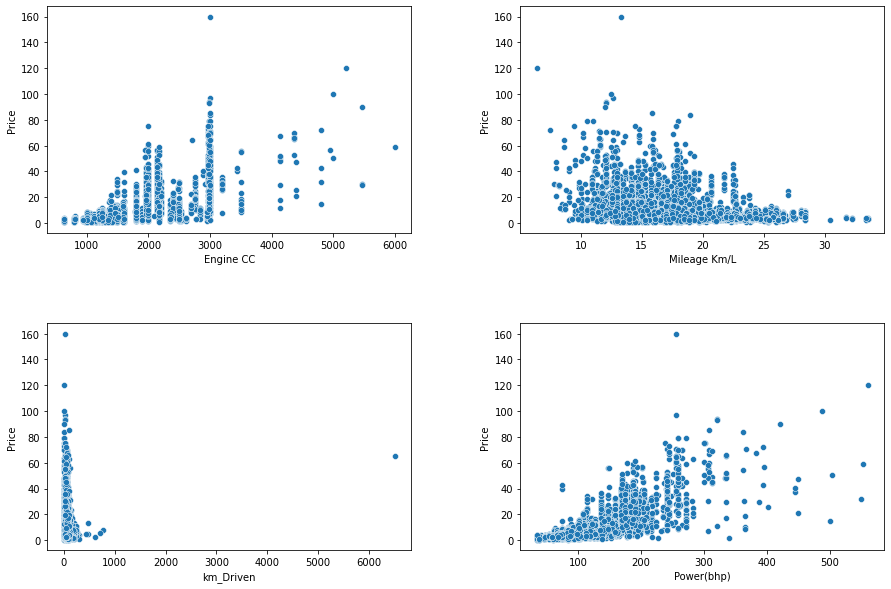

In [26]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(hspace = 0.4, wspace =0.3)
plt.subplot(2,2,1)
sns.scatterplot(x = 'Engine CC',y = 'Price',data = final_data)

plt.subplot(2,2,2)
sns.scatterplot(x = 'Mileage Km/L',y = 'Price',data = final_data)

plt.subplot(2,2,3)
sns.scatterplot(x = 'km_Driven',y = 'Price',data = final_data)

plt.subplot(2,2,4)
sns.scatterplot(x = 'Power(bhp)',y = 'Price',data = final_data)

plt.show()

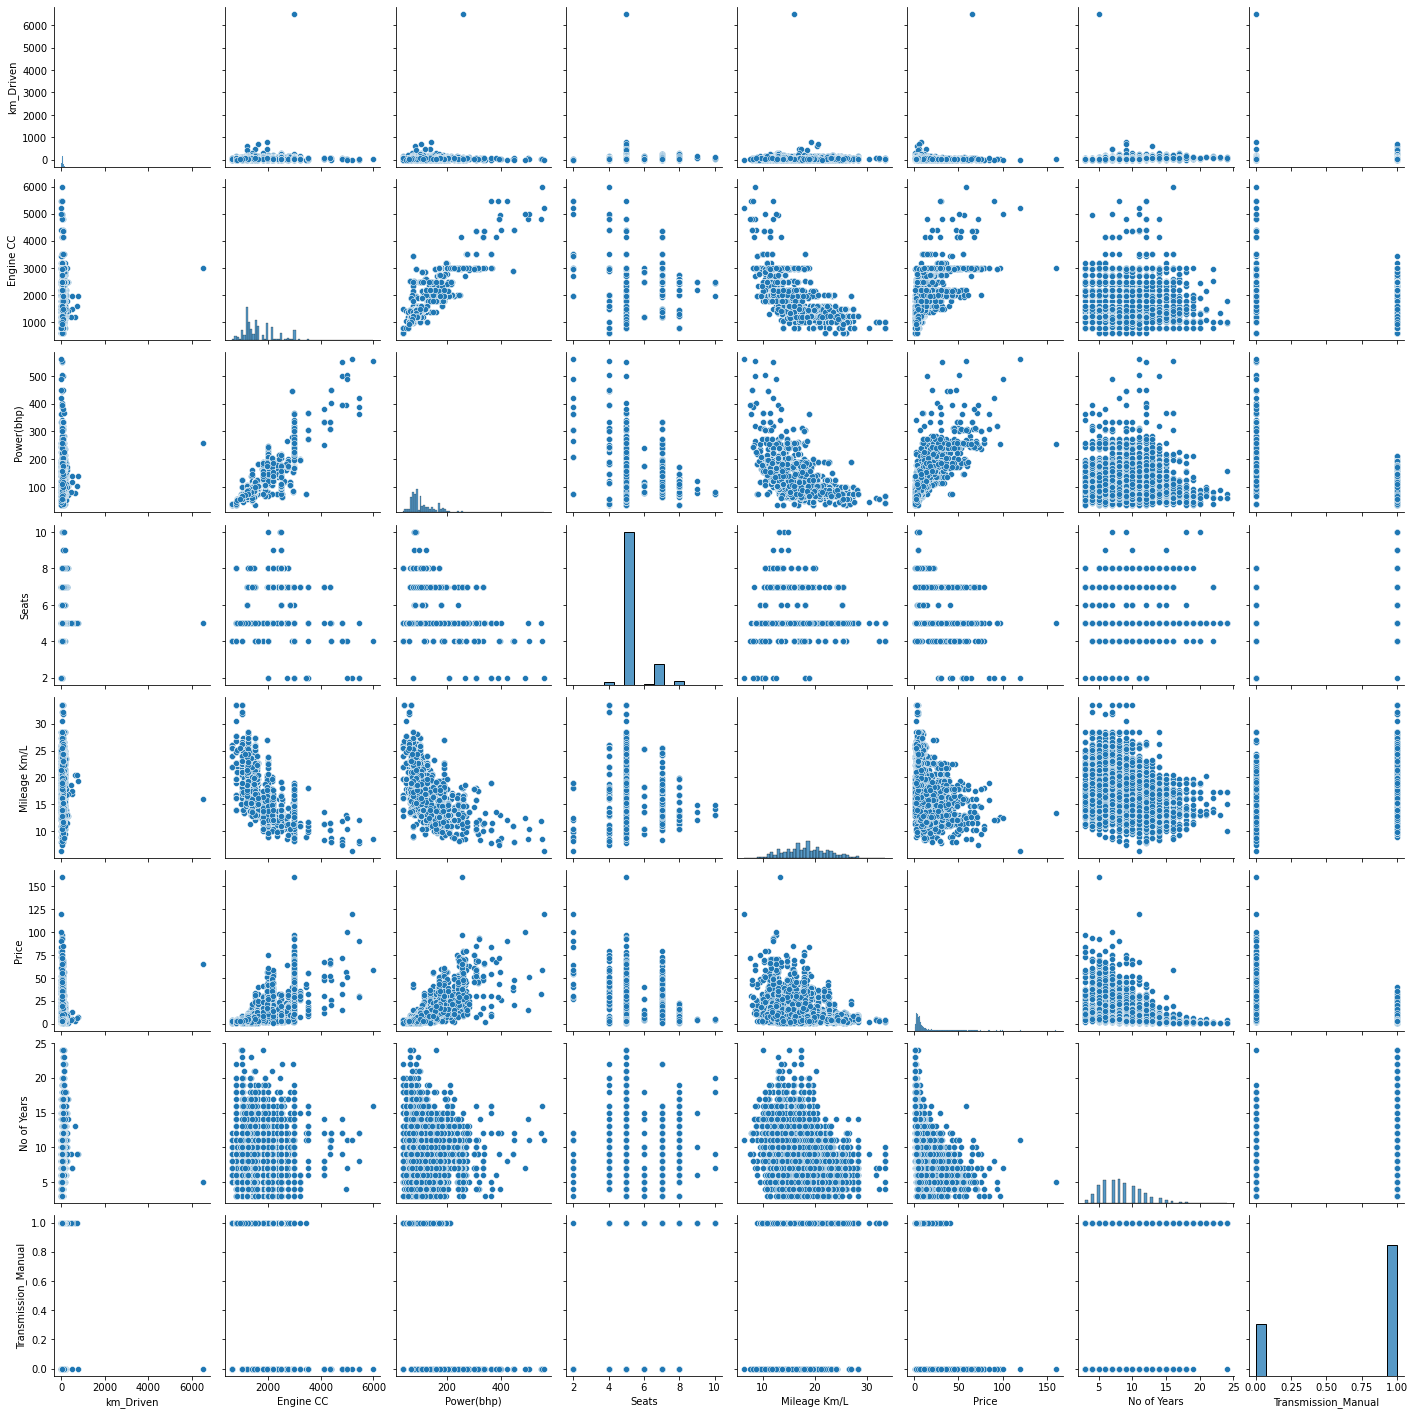

In [27]:
sns.pairplot(final_data)

c:\users\parth kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_Driven'>

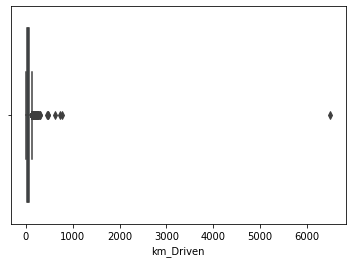

In [28]:
sns.boxplot(final_data['km_Driven'])


In [29]:
#Droping one row because km_driven(x10^3) have one outlier
kdriven = final_data[final_data.km_Driven>400].index.tolist()


In [30]:
final_data.drop(labels = kdriven ,inplace =True)
final_data.shape

(5911, 14)

c:\users\parth kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mileage Km/L'>

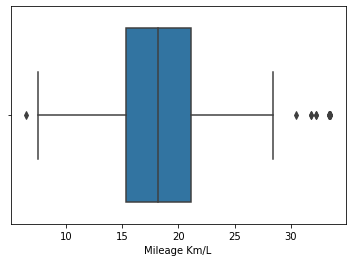

In [31]:
sns.boxplot(final_data['Mileage Km/L'])


As you can see there are outliners above 30 Km/L

In [32]:
final_data[final_data['Mileage Km/L']>30].head(3)


,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
1264,Maruti Alto 800 2016-2019 CNG LXI,Maruti,Mumbai,10.600,CNG,First,796,40.30,4,33.44,3.50,Maruti,4,1
1325,Maruti Wagon R CNG LXI,Maruti,Pune,79.494,CNG,First,998,67.04,5,33.54,2.96,Maruti,9,1
2049,Maruti Wagon R CNG LXI,Maruti,Mumbai,54.000,CNG,First,998,67.04,5,33.54,3.05,Maruti,9,1


In [33]:
index = final_data[(final_data['Mileage Km/L'] >30)].index
final_data.drop(index, inplace=True)
final_data['Mileage Km/L'].describe()


count    5897.000000
mean       18.318197
std         4.126984
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        28.400000
Name: Mileage Km/L, dtype: float64

c:\users\parth kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Engine CC'>

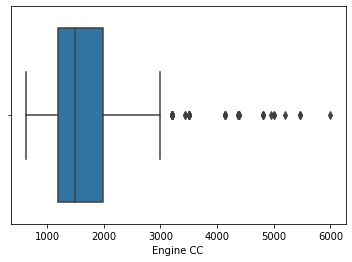

In [34]:
sns.boxplot(final_data['Engine CC'])


In [35]:
final_data[final_data['Engine CC']>3000].head(5)

,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
70,Porsche Cayenne 2009-2014 Turbo,Porsche,Mumbai,73.000,Petrol,First,4806,500.0,5,8.50,14.50,Porsche,14,0
152,Mercedes-Benz S Class 2005 2013 S 500,MercedesBenz,Kolkata,35.277,Petrol,First,5461,362.9,5,7.81,30.00,Mercedes-Benz,12,0
456,Audi Q7 4.2 TDI Quattro Technology,Audi,Coimbatore,51.002,Diesel,First,4134,335.2,7,11.33,48.91,Audi,6,0
583,Audi Q7 4.2 TDI Quattro Technology,Audi,Kochi,79.926,Diesel,First,4134,335.2,7,11.33,29.77,Audi,8,0
586,Mercedes-Benz S Class 2005 2013 S 350 L,MercedesBenz,Bangalore,47.088,Petrol,Second,3498,364.9,5,10.13,19.00,Mercedes-Benz,16,0


These are high end cars as evident from the company

In [36]:
index = final_data[(final_data['Engine CC'] >3000)].index
final_data.drop(index, inplace=True)
final_data['Engine CC'].describe()


count    5839.000000
mean     1598.203117
std       548.108429
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      2999.000000
Name: Engine CC, dtype: float64

c:\users\parth kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Power(bhp)'>

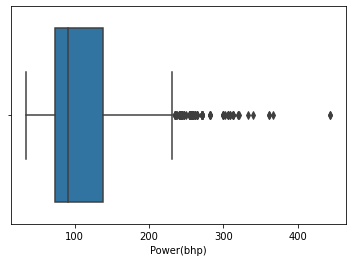

In [37]:
sns.boxplot(final_data['Power(bhp)'])

In [38]:
final_data[final_data['Power(bhp)']>300].head(1000)

,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
134,Mercedes-Benz SLC 43 AMG,MercedesBenz,Kolkata,13.372,Petrol,First,2996,362.07,2,19.00,54.00,Mercedes-Benz,5,0
148,Audi RS5 Coupe,Audi,Mumbai,23.000,Petrol,First,2894,444.00,4,11.05,37.00,Audi,9,0
323,BMW 6 Series 640d Gran Coupe,BMW,Mumbai,30.000,Diesel,First,2993,313.00,4,9.52,49.00,BMW,11,0
415,Mercedes-Benz GLC 43 AMG Coupe,MercedesBenz,Coimbatore,22.397,Petrol,First,2996,367.00,5,11.50,70.99,Mercedes-Benz,4,0
1118,BMW 7 Series 2007-2012 740Li,BMW,Pune,66.000,Petrol,Second,2979,321.00,5,8.45,10.75,BMW,14,0
1732,BMW X6 xDrive 40d,BMW,Hyderabad,58.000,Diesel,First,2993,306.00,4,11.20,48.00,BMW,9,0
1964,BMW 7 Series 740Li,BMW,Coimbatore,28.060,Petrol,First,2979,320.00,5,12.05,93.67,BMW,4,0
1974,BMW 7 Series 740Li,BMW,Bangalore,17.465,Petrol,First,2979,320.00,5,12.05,93.00,BMW,5,0
2078,BMW 6 Series 640d Coupe,BMW,Mumbai,30.000,Diesel,First,2993,313.00,4,9.52,45.00,BMW,9,0
2084,Mercedes-Benz SLC 43 AMG,MercedesBenz,Coimbatore,2.526,Petrol,First,2996,362.07,2,19.00,83.96,Mercedes-Benz,3,0


## These are all high ends car . Which are not good for dataset

In [39]:
index = final_data[(final_data['Power(bhp)'] >300)].index
final_data.drop(index, inplace=True)
final_data['Power(bhp)'].describe()

count    5817.000000
mean      109.968240
std        46.992234
min        34.200000
25%        74.000000
50%        91.100000
75%       136.000000
max       300.000000
Name: Power(bhp), dtype: float64

In [40]:
final_data.Price

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5970     4.75
5971     4.00
5972     2.90
5973     2.65
5974     2.50
Name: Price, Length: 5817, dtype: float64

In [41]:
final_data.isnull().sum()

Name                   0
Manufacturer           0
Location               0
km_Driven              0
Fuel_Type              0
Owner_Type             0
Engine CC              0
Power(bhp)             0
Seats                  0
Mileage Km/L           0
Price                  0
Brand                  0
No of Years            0
Transmission_Manual    0
dtype: int64

In [42]:
final_data[final_data['Seats']>8].head(1000)

,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
809,Toyota Qualis FS B2,Toyota,Pune,77.757,Diesel,Second,2446,75.0,10,13.10,3.50,Toyota,18,1
912,Tata Sumo DX,Tata,Mumbai,20.000,Diesel,First,1978,83.1,10,14.07,5.25,Tata,9,1
1340,Mahindra Scorpio LX BS IV,Mahindra,Bangalore,74.112,Diesel,First,2179,120.0,9,12.05,4.10,Mahindra,15,1
1898,Toyota Qualis FS B3,Toyota,Bangalore,63.000,Diesel,Third,2446,75.0,10,13.10,3.65,Toyota,20,1
2299,Chevrolet Tavera LT 9 Str BS IV,Chevrolet,Kolkata,67.132,Diesel,First,2499,78.0,9,13.58,4.75,Chevrolet,10,1
2344,Mahindra Xylo D2 Maxx,Mahindra,Chennai,150.000,Diesel,First,2489,93.7,9,14.95,4.50,Mahindra,6,1
2557,Chevrolet Tavera LS B3 10 Seats BSIII,Chevrolet,Hyderabad,120.000,Diesel,First,2499,80.0,10,14.80,5.50,Chevrolet,7,1


In [43]:
index=final_data[final_data['Price']>97].index
final_data.drop(index, inplace=True)
final_data['Price'].describe()

count    5815.000000
mean        8.989797
std         9.867003
min         0.440000
25%         3.500000
50%         5.600000
75%         9.500000
max        79.000000
Name: Price, dtype: float64

In [44]:
## Finding the relation between 'Price' and the independent variables.

In [45]:
# import seaborn as sns

# fig = plt.figure(figsize = (25,15))

# fig.subplots_adjust(hspace = 0.2, wspace =0.3)
# plt.subplot(2,2,1)
# #Relation between Price and location
# sns.barplot(x = 'Price', y ='Location', data  = final_data)
# plt.title('Price vs Location',fontsize  =25)

# #Relation between Price and year
# plt.subplot(2,2,2)
# sns.barplot(x ='No of Years', y ='Price', data  = final_data)
# plt.title('Price vs Year',fontsize  =25)

# #Relation between Price and Brand
# plt.subplot(2,2,3)
# sns.barplot(x = 'Price', y ='Brand', data  = final_data)
# plt.title('Price vs Brand',fontsize  =25)

# #Counting the which brand have most number of cars in our datasheet 
# plt.subplot(2,2,4)
# sns.countplot(y ='Brand', data  = final_data)
# plt.title('Count of cars of a Brand',fontsize  =25)

# plt.show()

In [46]:
final_data.head()

,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,72.00,CNG,First,998,58.16,5,26.60,1.75,Maruti,12,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,41.00,Diesel,First,1582,126.20,5,19.67,12.50,Hyundai,7,1
2,Honda Jazz V,Honda,Chennai,46.00,Petrol,First,1199,88.70,5,18.20,4.50,Honda,11,1
3,Maruti Ertiga VDI,Maruti,Chennai,87.00,Diesel,First,1248,88.76,7,20.77,6.00,Maruti,10,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,40.67,Diesel,Second,1968,140.80,5,15.20,17.74,Audi,9,0


In [47]:
LE_DT = final_data


In [48]:
# scaling the columns KMs_driven, mileage, power and engine using Standardisation

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# LE_DT['KMs_scaled'] = scaler.fit_transform(LE_DT[['km_Driven']])
# LE_DT['Mileage_scaled'] = scaler.fit_transform(LE_DT[['Mileage Km/L']])
# LE_DT['Engine_scaled'] = scaler.fit_transform(LE_DT[['Engine CC']])
# LE_DT['Power_scaled'] = scaler.fit_transform(LE_DT[['Power(bhp)']])

In [49]:
LE_DT.head()


,Name,Manufacturer,Location,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,Brand,No of Years,Transmission_Manual
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,72.00,CNG,First,998,58.16,5,26.60,1.75,Maruti,12,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,41.00,Diesel,First,1582,126.20,5,19.67,12.50,Hyundai,7,1
2,Honda Jazz V,Honda,Chennai,46.00,Petrol,First,1199,88.70,5,18.20,4.50,Honda,11,1
3,Maruti Ertiga VDI,Maruti,Chennai,87.00,Diesel,First,1248,88.76,7,20.77,6.00,Maruti,10,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,40.67,Diesel,Second,1968,140.80,5,15.20,17.74,Audi,9,0


defining numerical and categorical values

In [50]:


num_col=['year','odometer','long','lat','km_Driven','Engine CC','Power(bhp)','Seats','Mileagec Km/L' ,'No of Years' ,'Transmission_Manual','KMs_scaled' ]
cat_cols=['Name','Manufacturer','Location','Owner_Type','Brand']


In [51]:
fd=LE_DT.copy()

In [52]:

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# import sklearn
le=preprocessing.LabelEncoder()
label_encoder = LabelEncoder()

# [cat_cols]=LE_DT[cat_cols].apply(le.fit_transform)
# LE_DT['Location'] = label_encoder.fit_transform(LE_DT['Location'])
# LE_DT['Manufacturer'] = label_encoder.fit_transform(LE_DT['Manufacturer'])
# LE_DT['Name'] = label_encoder.fit_transform(LE_DT['Name'])
LE_DT['Owner_Type'] = label_encoder.fit_transform(LE_DT['Owner_Type'])
# LE_DT['Brand'] = label_encoder.fit_transform(LE_DT['Brand'])
LE_DT['Fuel_Type'] = label_encoder.fit_transform(LE_DT['Fuel_Type'])

In [53]:
LE_DT=LE_DT.drop(['Location'],axis=1) 
LE_DT=LE_DT.drop(['Manufacturer'],axis=1) 
LE_DT=LE_DT.drop(['Name'],axis=1) 
LE_DT=LE_DT.drop(['Brand'],axis=1) 

# LE_DT.drop[''] 
# LE_DT.drop['']
# LE_DT.drop['']
LE_DT

,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,No of Years,Transmission_Manual
0,72.000,0,0,998,58.16,5,26.60,1.75,12,1
1,41.000,1,0,1582,126.20,5,19.67,12.50,7,1
2,46.000,3,0,1199,88.70,5,18.20,4.50,11,1
3,87.000,1,0,1248,88.76,7,20.77,6.00,10,1
4,40.670,1,2,1968,140.80,5,15.20,17.74,9,0
...,...,...,...,...,...,...,...,...,...,...
5970,27.365,1,0,1248,74.00,5,28.40,4.75,8,1
5971,100.000,1,0,1120,71.00,5,24.40,4.00,7,1
5972,55.000,1,2,2498,112.00,8,14.00,2.90,10,1
5973,46.000,3,0,998,67.10,5,18.90,2.65,9,1


In [54]:
LE_DT.to_csv('datadfnaognjwro.csv')

In [55]:
LE_DT.describe()

,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,Price,No of Years,Transmission_Manual
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000
mean,57.108367,1.901462,0.373001,1592.492519,109.918358,5.286328,18.415599,8.989797,8.578332,0.724506
std,33.600230,1.005193,0.812057,541.963642,46.923251,0.784729,4.061054,9.867003,3.203726,0.446801
min,0.171000,0.000000,0.000000,624.000000,34.200000,2.000000,8.200000,0.440000,3.000000,0.000000
25%,34.000000,1.000000,0.000000,1198.000000,74.000000,5.000000,15.500000,3.500000,6.000000,0.000000
50%,53.000000,1.000000,0.000000,1462.000000,91.100000,5.000000,18.400000,5.600000,8.000000,1.000000
75%,73.000000,3.000000,0.000000,1968.000000,136.000000,5.000000,21.100000,9.500000,10.000000,1.000000
max,300.000000,3.000000,3.000000,2999.000000,300.000000,10.000000,28.400000,79.000000,24.000000,1.000000


## Splitting and testing

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np

y = np.log1p(LE_DT.Price)  
X = LE_DT.drop(['Price'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.82,test_size=0.18,random_state=0)

In [57]:
y_train.describe()

count    4768.000000
mean        1.996986
std         0.719441
min         0.371564
25%         1.504077
50%         1.887070
75%         2.351375
max         4.382027
Name: Price, dtype: float64

# Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [59]:
lm.fit(X_train,y_train)
plt.show()


In [60]:
y_pred = lm.predict(X_test)


In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1156,2.060514,2.262061
311,1.418277,1.409744
4685,1.909543,1.697880
992,2.206074,2.224203
4325,1.163151,1.432433
...,...,...
2724,2.315501,2.122655
1084,1.832581,1.898990
37,1.766442,1.895364
832,1.719189,1.854550


### Calculate these metrics by hand!


In [62]:
from sklearn import metrics

# import mean_absolute_error, mean_squared_error
# print("MAE: " + str(mean_absolute_error(y_pred, y_valid)))
# print("MSE: " + str(mean_squared_error(y_pred, y_valid)))


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.18413086306201043
MSE: 0.058192940740294484
RMSE: 0.2412321304061598


In [63]:
lm.score(X_test,y_test)


0.8850062173229631

Text(0, 0.5, 'Predicted')

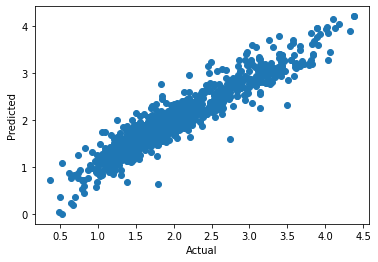

In [64]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## RANDOM FOREST REGRESSOR


In [65]:
from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)

In [66]:
df2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df2

,Actual,Predicted
1156,2.060514,1.937535
311,1.418277,1.416515
4685,1.909543,1.722382
992,2.206074,2.180212
4325,1.163151,1.376251
...,...,...
2724,2.315501,2.226036
1084,1.832581,1.780164
37,1.766442,1.829321
832,1.719189,1.833763


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: " + str(mean_absolute_error(y_pred2, y_test)))
print("MSE: " + str(mean_squared_error(y_pred2, y_test)))
# print("'RMSE:"+str(rootmean_squared_error(y_pred2, y_test)))

MAE: 0.13543073381663312
MSE: 0.032987832143273554


In [68]:
regressor2.score(X_test,y_test)


0.9348134747580558

Text(0, 0.5, 'Predicted')

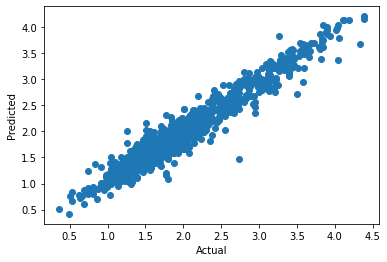

In [69]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [70]:
X_train

,km_Driven,Fuel_Type,Owner_Type,Engine CC,Power(bhp),Seats,Mileage Km/L,No of Years,Transmission_Manual
1620,54.898,3,3,1298,88.20,5,16.10,12,1
5286,75.000,3,2,1497,78.00,5,17.70,15,1
32,72.000,1,2,2696,184.00,7,11.18,9,0
4933,109.606,1,0,1582,126.20,5,22.00,14,1
4323,82.000,1,2,1399,68.00,5,13.80,12,1
...,...,...,...,...,...,...,...,...,...
5063,82.606,3,2,1198,90.00,5,16.00,12,1
3359,32.189,1,0,1498,98.96,5,23.00,4,1
1700,37.124,3,0,1197,81.80,5,20.40,5,1
2679,51.000,1,0,1968,181.00,5,15.17,7,0


## This will be my file which will predict the cost of the used data based on the input of the user

In [71]:
import pickle
file=open('Random Forest Regression Model.pkl','wb')
pickle.dump(regressor2,file)

In [72]:
# Xgboost